In [1]:
# data Analysis
import pandas as pd
import numpy as np
import random as rng

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inlinewhich pip


#SciKit Learn Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

UsageError: unrecognized arguments: pip


In [2]:
from subprocess import check_output
print(check_output(["ls", "Scrapers/data"]).decode("utf8"))
data = pd.read_csv("Scrapers/data/finalout.csv")

fighter_profile_template.json
fight_json
finalout.csv
json_with_other_template
move_files.py
profile_json
profile_links
results_record.json
time_bound_profiles



In [3]:
data.describe()

,BPrev,BStreak,B_Age,B_Height,B_ID,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,...,R__Round5_TIP_Distance Time,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time
count,2169.000000,2169.000000,2049.000000,2049.000000,2169.000000,2052.000000,1529.000000,1529.000000,1529.000000,1529.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,2.263255,0.744583,31.742801,177.249878,2124.675888,73.481969,0.073250,1.064094,0.547417,3.618051,...,267.532000,35.528000,68.256000,6.756000,4.240000,4.644000,12.916000,279.712000,4.688000,321.988000
std,2.428562,1.148659,4.120941,8.859639,705.206120,15.264902,0.300301,1.492503,1.015203,4.989055,...,194.949713,77.862929,102.307192,25.276473,13.490678,13.255493,40.568215,196.521919,21.726824,220.780461
min,0.000000,0.000000,21.000000,152.000000,129.000000,52.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,29.000000,172.000000,1905.000000,61.000000,0.000000,0.000000,0.000000,0.000000,...,160.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,163.000000,0.000000,194.000000
50%,2.000000,0.000000,31.000000,177.000000,2229.000000,70.000000,0.000000,1.000000,0.000000,2.000000,...,232.000000,2.000000,17.000000,0.000000,0.000000,0.000000,0.000000,267.000000,0.000000,298.000000
75%,3.000000,1.000000,34.000000,182.000000,2733.000000,84.000000,0.000000,2.000000,1.000000,5.000000,...,299.000000,36.250000,109.000000,0.000000,0.000000,1.000000,3.000000,301.000000,0.000000,370.750000
max,13.000000,10.000000,48.000000,213.000000,3196.000000,120.000000,3.000000,13.000000,7.000000,47.000000,...,1259.000000,633.000000,666.000000,144.000000,91.000000,62.000000,273.000000,1291.000000,200.000000,1473.000000


In [4]:
data.describe(include=['O'])

,B_HomeTown,B_Location,B_Name,Date,R_HomeTown,R_Location,R_Name,winby,winner
count,2048,2051,2169,2169,2031,2033,2169,2143,2169
unique,658,515,918,352,588,466,814,3,4
top,Rio de Janeiro Brazil,Rio de Janeiro Brazil,Kevin Lee,10/08/2018,Rio de Janeiro Brazil,Rio de Janeiro Brazil,Donald Cerrone,DEC,red
freq,42,47,10,75,62,82,14,1053,1240


### Some Notes to observe
- Red Side seems to win slightly more than blue (1240/2169 = 57.16%)
- Donald Cerrone fights on Red side more than any other fighter, with 14 fights
- Kevin Lee fights on Blue side more than any other fighter with 10
- Most Fights are won by decision
- The Most common hometown and training location for fighters is Rei De Janeiro in Brazil

In [5]:
data.head()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,0,0,38.0,193.0,Hounslow England,808,Amsterdam The Netherlands,Alistair Overeem,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,blue
1,0,0,36.0,172.0,"Chicago, Illinois United States",1054,"Chicago, Illinois United States",Ricardo Lamas,65.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
2,0,0,39.0,167.0,"Isla Vista , California USA",959,"Sacramento, California USA",Urijah Faber,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
3,0,0,33.0,167.0,"San Diego, CA USA",1056,"San Diego, CA USA",Danny Martinez,56.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
4,0,0,36.0,185.0,Southampton England,2005,Southampton England,Tom Watson,84.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red


In [6]:
data.tail()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
2164,6,0,34.0,172.0,"El Paso, Texas United States",1137,"Coconut Creek, Florida United States",Nik Lentz,70.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,blue
2165,9,1,31.0,177.0,"Milwaukee, Wisconsin United States",1069,"Milwaukee, Wisconsin United States",Anthony Pettis,70.0,3.0,...,0.0,0.0,0.0,0.0,0.0,298.0,0.0,298.0,KO/TKO,red
2166,4,4,35.0,180.0,Amazonas Brazil,2101,Rio de Janeiro Brazil,Alan Patrick,70.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
2167,1,0,37.0,170.0,"Moses Lake, Washington United States",1200,"Houston, Texas United States",Tonya Evinger,61.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
2168,0,0,23.0,190.0,"Los Angeles, California United States",3072,"Fontana, California United States",Jalin Turner,70.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red


In [7]:
data.fillna(value=0,inplace=True)

In [8]:
data.tail()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
2164,6,0,34.0,172.0,"El Paso, Texas United States",1137,"Coconut Creek, Florida United States",Nik Lentz,70.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KO/TKO,blue
2165,9,1,31.0,177.0,"Milwaukee, Wisconsin United States",1069,"Milwaukee, Wisconsin United States",Anthony Pettis,70.0,3.0,...,0.0,0.0,0.0,0.0,0.0,298.0,0.0,298.0,KO/TKO,red
2166,4,4,35.0,180.0,Amazonas Brazil,2101,Rio de Janeiro Brazil,Alan Patrick,70.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KO/TKO,red
2167,1,0,37.0,170.0,"Moses Lake, Washington United States",1200,"Houston, Texas United States",Tonya Evinger,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KO/TKO,red
2168,0,0,23.0,190.0,"Los Angeles, California United States",3072,"Fontana, California United States",Jalin Turner,70.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KO/TKO,red


In [9]:
dropdata = data.drop(['B_ID','B_Name','R_ID','R_Name','winby','Date'],axis=1)
dropdata.rename(columns={'BPrev':'B__Prev',
                         'RPrev':'R__Prev',
                         'B_Age':'B__Age',
                         'B_Height':'B__Height',
                         'B_Weight':'B__Weight',
                         'R_Age':'R__Age',
                         'R_Height':'R__Height',
                         'R_Weight':'R__Weight',
                         'BStreak':'B__Streak',
                         'RStreak': 'R__Streak'},inplace=True)
dropdata.describe()

,B__Prev,B__Streak,B__Age,B__Height,B__Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,B__Round1_Grappling_Takedowns_Landed,...,R__Round5_TIP_Distance Time,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time
count,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,...,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000
mean,2.263255,0.744583,29.986630,167.443522,69.518211,0.051637,0.750115,0.385892,2.550484,1.091286,...,30.835869,4.094975,7.867220,0.778700,0.488704,0.535270,1.488704,32.239742,0.540341,37.112494
std,2.428562,1.148659,8.290244,41.435693,22.273807,0.254314,1.343730,0.888116,4.501882,2.058858,...,108.014387,28.724294,40.956606,8.833792,4.768341,4.730834,14.354146,111.435276,7.513908,127.183662
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,28.000000,170.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,31.000000,177.000000,70.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,34.000000,182.000000,77.000000,0.000000,1.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,13.000000,10.000000,48.000000,213.000000,120.000000,3.000000,13.000000,7.000000,47.000000,20.000000,...,1259.000000,633.000000,666.000000,144.000000,91.000000,62.000000,273.000000,1291.000000,200.000000,1473.000000


In [10]:
dropdata.describe(include=['O'])

,B_HomeTown,B_Location,R_HomeTown,R_Location,winner
count,2169,2169,2169,2169,2169
unique,659,516,589,467,4
top,0,0,0,0,red
freq,121,118,138,136,1240


In [11]:
objecttypes = list(dropdata.select_dtypes(include=['O']).columns)
for col in objecttypes:
    dropdata[col] = dropdata[col].astype('category')

In [12]:
cat_columns = dropdata.select_dtypes(['category']).columns
dropdata[cat_columns] = dropdata[cat_columns].apply(lambda x: x.cat.codes)
dropdata.info()
dropdata.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2169 entries, 0 to 2168
Columns: 888 entries, B__Prev to winner
dtypes: float64(876), int16(4), int64(7), int8(1)
memory usage: 14.6 MB


,B__Prev,B__Streak,B__Age,B__Height,B_HomeTown,B_Location,B__Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,...,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winner
2164,6,0,34.0,172.0,157,106,70.0,0.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2165,9,1,31.0,177.0,351,294,70.0,3.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,298.0,0.0,298.0,3
2166,4,4,35.0,180.0,20,375,70.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2167,1,0,37.0,170.0,360,211,61.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2168,0,0,23.0,190.0,314,168,70.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


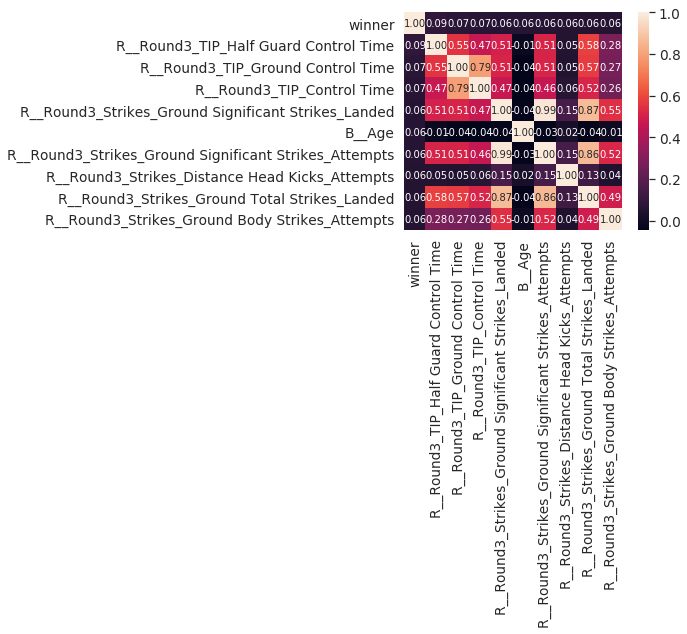

In [13]:
k = 10 #number of variables for heatmap
corrmat = dropdata.corr()
cols = corrmat.nlargest(k, 'winner')['winner'].index
cm = np.corrcoef(dropdata[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [14]:
X_all = dropdata.drop(['winner'], axis=1)
y_all = dropdata['winner']